In [131]:
#TSP Environment
import gym
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist



# Define the environment
class TSPEnv(gym.Env):
  def __init__(self, n_cities=4, show_debug_data = False, test_environment = False):
    self.n_cities = n_cities
    self.xy = (np.random.rand(self.n_cities,2)*100).round(2)
    #self.xy = np.array([[20.01, 80.01], [10.01, 50.01],[50.01, 30.01],[80.01 , 80.01]])
    self.x=self.xy[:,0]
    self.y=self.xy[:,1]
    self.step_counter = 0
    self.show_debug_data = show_debug_data
    self._array_visited = np.zeros(self.n_cities)
    self._total_distance = 0
    self.test = test_environment
    

    #print(f'genrated stops xy: {self.xy}')
    self.distance_matrix = cdist(self.xy,self.xy,'euclidean').round(0)
    # print(self.distance_matrix.shape)

    self.min_reward = np.amax(self.distance_matrix)
    
    self.current_city = np.random.randint(n_cities)
    self.visited_cities = [self.current_city]
    self._array_visited[self.current_city] = 1
    self.remaining_cities = [i for i in range(n_cities)]
    self.cities_list = [i for i in range(n_cities)]
    self.remaining_cities.remove(self.current_city)
    # Define the action space
    self.action_space = gym.spaces.Discrete(n_cities)

    high = np.array(
      [
        np.zeros(4),
        np.zeros(4),
      ],
      dtype=np.int32,
    )

    # Define the observation space
    self.observation_space = gym.spaces.Box(-high, high, dtype=np.int32)
    #self.observation_space = gym.spaces.MultiBinary(n_cities)

    if(self.show_debug_data):
        print(f'Current city in init: {self.current_city}')
        print(f'Remaining city in init: {self.remaining_cities}')
        print(f'Visited city in init: {self.visited_cities}')
        print(f'Stepcounter in init: {self.step_counter}')
        print(f'Observation in init: {self._array_visited}')

  def plotCities(self):
    fig, ax = plt.subplots(1, figsize=(7,7))
    fig.suptitle = "Delivery Stops"
    plt.scatter(self.x,self.y)
    xcoord = []
    ycoord = []
    for i in range(0,len(self.visited_cities)):
      xcoord.append(self.x[self.visited_cities[i]])
      ycoord.append(self.y[self.visited_cities[i]])
      if(i == 0):
        ax.annotate("Anfang", xy=(xcoord[i], ycoord[i]), xytext=(xcoord[i]+0.5, ycoord[i]))
      ax.annotate(str(i), xy=(xcoord[i], ycoord[i]), xytext=(xcoord[i]+0.5, ycoord[i]))

    plt.plot(xcoord, ycoord)

  def reset(self):
    self.distance_matrix = cdist(self.xy,self.xy,'euclidean').round(0)
    self.step_counter = 0
    self._total_distance = 0
    self._array_visited = np.zeros(self.n_cities)
    self.current_city = np.random.randint(self.n_cities)
    self._array_visited[self.current_city] = 1
    self.visited_cities = [self.current_city]
    self.remaining_cities = [i for i in range(self.n_cities)]
    self.remaining_cities.remove(self.current_city)
    
    if(self.show_debug_data):
      print(f'Observation in Reset: {self._array_visited}')
    return self._get_observation()

  def step(self, action):
    done = False
    self.step_counter += 1
    #reward = -999
    reward = -self.min_reward

    if(self.show_debug_data):
      print(f'Action in Step(top): {action}')
      print(f'Remaining-City Step(top): {self.remaining_cities}')
      print(f'Observation in step: {self._array_visited}')
    
    if (action in self.remaining_cities):
      if(self.show_debug_data):
        print('Action True')
      
      reward = -self.distance_matrix[self.current_city][action]
      self._total_distance += reward

      self.remaining_cities.remove(action)
      self.visited_cities.append(action)
      self._array_visited[action] = 1
      self.current_city = action


      if (len(self.remaining_cities) == 0):
        startingpoint = self.visited_cities[0]
        self.visited_cities.append(startingpoint)
        reward += -self.distance_matrix[self.current_city][startingpoint]
        done = True
        #self.plotCities()
        
      
      if(self.show_debug_data):
        print(f'Action in step: {action}')
        print(f'Reward in step: {reward}')
        print(f'Current city in step: {self.current_city}')
        print(f'Remaining city in step: {self.remaining_cities}')
        print(f'Visited city in step: {self.visited_cities}')
        print(f'Stepcounter in step: {self.step_counter}')
        print(f'Observation in step: {self._array_visited}')
      
      return self._get_observation(), reward, done, {}
    else:
        return self._get_observation(), reward, False, {}



  def _get_observation(self):
    for i in range(len(self.distance_matrix)):
      for j in self.visited_cities:
          self.distance_matrix[i][j] = 0

    observationDistance = self.distance_matrix[self.current_city]
    # observation[self.current_city] = 1
    # return observation
    observation = self._array_visited, observationDistance
    
    return np.ravel(observation)

  
  def _test_distance(self,CurrentCity, NextCity):
    return -self.distance_matrix[CurrentCity][NextCity]
    
  


(array([ 1.,  0.,  1.,  0.,  0.,  0., 96.,  0., 81., 36.]), -76.0, False, {})
0
(array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 81., 62.]), -96.0, False, {})
(array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 81., 62.]), -96.0, False, {})
(array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0., 60.]), -81.0, False, {})
(array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.]), -60.0, True, {})
[2, 0, 1, 3, 4, 2]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


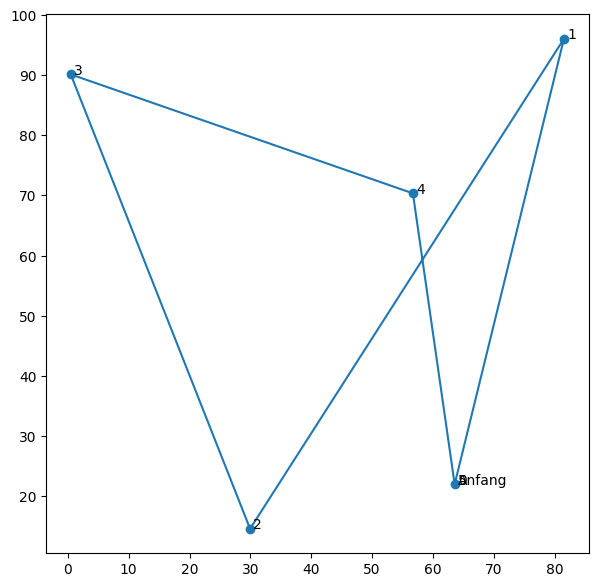

In [132]:
env = TSPEnv(5)
x = env.reset()
print(env.step(0))

print(env.current_city)
print(env.step(1))

print(env.step(2))

print(env.step(3))

print(env.step(4))

print(env.visited_cities)
print(env.distance_matrix)
env.plotCities()

# dist_matrix = env.distance_matrix
# visited = env.visited_cities

# len(dist_matrix)

# for i in range(len(dist_matrix)):
#     for j in visited:
#         dist_matrix[i][j] = 0

# visited.append(1)

# dist_matrix

In [144]:
#DQNAgent 
import gym
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

import rl
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

env = TSPEnv(5)
observation_space = env.reset()

# setup experience replay buffer
memory = SequentialMemory(limit=50000, window_length=1)

# setup the Linear annealed policy with the EpsGreedyQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=  EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                          # attribute in the inner policy to vary             
                               value_max=1.0,                       # maximum value of attribute that is varying
                               value_min=0.1,                       # minimum value of attribute that is varying
                               value_test=0.05,                     # test if the value selected is < 0.05
                               nb_steps=5000)                      # the number of steps between value_max and value_min

#Feed-Forward Neural Network Model for Deep Q Learning (DQN)
model = Sequential()
#Input is 1 observation vector, and the number of observations in that vector 
model.add(Input(shape=(1,len(observation_space))))  
model.add(Flatten())
#Hidden layers with 24 nodes each
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
#Output is the number of actions in the action space
model.add(Dense(env.action_space.n, activation='linear')) 


#Feed-Forward Neural Network Architecture Summary
print(model.summary())

#Defining DQN Agent for DQN Model
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=250,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

# Finally, we configure and compile our agent. 
#We can use built-in tensorflow.keras Adam optimizer and evaluation metrics            

dqn.compile(Adam(learning_rate=1e-3), metrics=['mae','accuracy'])


#Finally fit and train the agent
history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 10)                0         
                                                                 
 dense_15 (Dense)            (None, 512)               5632      
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 270,853
Trainable params: 270,853
Non-trainable params: 0
_________________________________________________________________
None
Training for 20000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 83s 8ms/step - reward: -47.4770
1752 episodes - episode_reward: -270

In [ ]:
# Visualize the history for number of Training episode steps of the Cart Pole Game
plt.figure(figsize = (18,10))
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

# Finally, evaluate and test our algorithm for 20 episodes.
dqn.test(env, nb_episodes=20, visualize=False)

In [134]:
#Finally fit and train the agent
history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 82s 8ms/step - reward: -67.1151
done, took 81.681 seconds


-108.0


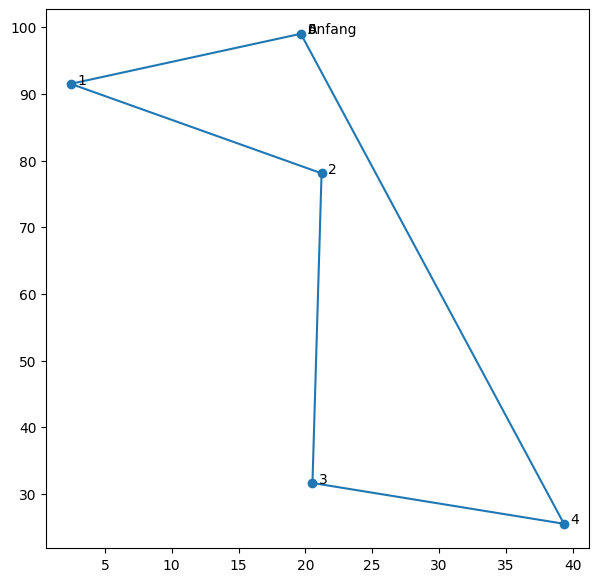

In [155]:
done = False
state = env.reset()


while not done:
    if(len(env.visited_cities) > env.n_cities):
        done = True
    
    next_state = dqn.forward(state)
    
    state_step = env.step(next_state)[0]


print(env._total_distance)
env.plotCities()


In [139]:
# After training is done, we save the final weights.
dqn.save_weights('dqn_weights.h5f', overwrite=True)



TypeError: 'numpy.int32' object is not callable

In [214]:
xy = np.array([[20.01, 80.01], [10.01, 50.01],[50.01, 30.01],[80.01 , 80.01]])

distance_matrix = cdist(xy,xy,'euclidean').round(0)
print(distance_matrix)

np.amax(distance_matrix)


[[ 0. 32. 58. 60.]
 [32.  0. 45. 76.]
 [58. 45.  0. 58.]
 [60. 76. 58.  0.]]


76.0